In [514]:
import os
import json
import requests
from src.najdi_rok import najdi_rok
import pandas as pd

In [515]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [516]:
odkud = 'data_raw/nobelistvo'

In [517]:
df = pd.DataFrame()
for f in os.listdir(odkud):
    pracovni = pd.read_parquet(os.path.join(odkud, f))
    kod = f.split('_')[2].split('.')[0]
    print(kod)
    pracovni = pracovni[pracovni['100_7'].astype(str).str.contains(kod, na=False)]
    df = pd.concat([df, pracovni])

xx0047446
skuk0000903
jn19990000824
jn20020220002
jo20000080728
jn19990007946
jn20000700279
jn19990004353
skuk0000369
jn19990004817
jn20000700710
jn19990005277
jn19990003245
jn19981002206
jn19990007118
jn19990003311
jn20010316093
jn20010602599
jn20010420012
jn20000602790
jn19981001227
jn19990000655
jn19990009341
jn19990006988
jn19990007481
jn20010601143
jn19990000717
jn19990008691
jn19990005365
jn19990005053
xx0047446
jn19990002542
jn19990210139
jn20000604446
jn20000604273
jn19981001818
jn19990001184
xx0003184
xx0004106
jn19981001854
jn19990003467
jn19990002664
jn19990002039
jn19990002183
jn20000604734
jn19990004816
jn19990005491
jn19990003864
jn19990003371
jn19981001730
jn19981001567
jn19990001315
jn19990210479
jn20000604537
jn19990007305
jn19990000190
jn19990008205
jn20000402202
jn19990007359
jn19990209875
jn20000600054
jn20000810312
jn19990000297
jn20000603323
jn19990000595
jn19990210579
jn19990006057
jn19990000996
xx0003206
jn20000603236
ola2003169712
jn20000604067
jn19990000650
jn

In [518]:
koho['100_7'].to_list()

['xx0047446',
 'skuk0000903',
 'jn19990000824',
 'jo20000080728',
 'jn20020220002',
 'jn19990007946',
 'jn20000700279',
 'jn19990004353',
 'skuk0000369',
 'jn19990004817',
 'jn20000700710',
 'jn19990005277',
 'jn19990003245',
 'jn19981002206',
 'jn19990007118',
 'jn19990003311',
 'jn20010602599',
 'jn20010316093',
 'jn20010420012',
 'jn20000602790',
 'jn19981001227',
 'jn19990000655',
 'jn19990009341',
 'jn19990006988',
 'jn19990007481',
 'jn20010601143',
 'jn19990000717',
 'jn19990008691',
 'jn19990005365',
 'jn19990005053',
 'xx0004106',
 'jn19990000190',
 'jn19990002840',
 'jn20000810312',
 'jn19990002542',
 'jo20010082967',
 'jn19990210139',
 'jn20000604446',
 'jn20000604273',
 'jn19981001818',
 'jn19990003467',
 'jn19981001854',
 'jn19990002664',
 'jn19990210479',
 'jn20000604537',
 'jn19990007305',
 'jn20000402202',
 'jn19990209875',
 'ola2003169712',
 'jn20000604067',
 'jn19990000650',
 'jn19990000099',
 'jn19990007991',
 'ola2002161265',
 'jn19990001316',
 'jn19990002751',
 'jk

In [519]:
df

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul,072_a,072_x,260_c,264_c,300_a,490_a,655_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknhak03542,020325s1939 xr e 000 p cze,[1],"[Karlfeldt, Erik Axel,]",[xx0047446],[aut],[1864-1931],None,None,None,None,[1],[0],[Písně pustin a lásky /],None,[Karl Erik Karlfeldt ; úvodem opatřil Oldřich ...,None,None,None,None,None,None,"[1, 1]","[Heidrich, Oldřich,, Krausová-Lesná, Milada,]","[aui, trl]","[1892-1950, 1888-1961]","[jk01040504, jk01071925]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1939.0,1901,Písně pustin a lásky,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk193703203,990427s1937 xr ||| | cze,[1],"[Mommsen, Theodor,]",[skuk0000903],[aut],[1817-1903],None,None,None,None,[1],[0],[Diktátoři /],None,"[Theodor Mommsen ; z ""Římských dějin"" vybral, ...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1937.0,1902,Diktátoři,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpk19970183385,970124s1996 xr e 000 0dcze,[1],"[Mommsen, Theodor,]",[skuk0000903],[aut],[1817-1903],None,None,None,None,[1],[0],[Diktátoři /],None,"[Theodor Mommsen ; [z němčiny vybral, přeložil...",None,None,None,None,None,None,"[1, 1]","[Eisner, Pavel,, Novák, Augustin]","[aui, aui]","[1889-1958, None]","[jk01030380, None]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1996.0,1902,Diktátoři,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpk20000960946,000413s1941 xr e 000 0ccze,[1],"[Mommsen, Theodor,]",[skuk0000903],[aut],[1817-1903],None,None,None,None,[1],[0],[Diktátoři /],None,"[Theodor Mommsen ; z ""Římských dejin"" vybral a...",None,None,None,None,None,None,[1],"[Eisner, Pavel,]",[trl],[1889-1958],[jk01030380],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1941.0,1902,Diktátoři,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk192604454,000915s1926 xr ||| | cze,[1],"[Bjørnson, Bjørnstjerne,]",[jn19990000824],[aut],[1832-1910],None,None,None,None,[1],[0],[Mary :],[román /],[Björnstjerne Björnson ; [přeložil Hugo Koster...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1926.0,1903,Mary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20071712779,070316s2007 xr g 000 f cze,NaN,"[Fosse, Jon,]",[jn20010525435],[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Ráno a večer /],NaN,[Jon Fosse ; [přeložil Ondřej Vimr]],NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,Ráno a večer,[821.11],[Germánské literatury],[2007],None,[78 s. ;],None,"[norské romány, Norwegian fiction]"
nkc20071758190,071010m20072009xr g 000 f cze,NaN,"[Fosse, Jon,]",[jn20010525435],[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Melancholie /],NaN,[Jon Fosse ; [přeložila Barbora Závodská]],NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,Melancholie,[821.11],[Germánské literatury],[2007-2009],None,"[2 sv. (242, 158 s.) ;]",None,"[norské romány, Norwegian fiction]"
nkc20091930817,090521s2009 xr g 000 j cze,NaN,"[Fosse, Jon,]",[jn20010525435],[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Mámení :],NaN,[Jon Fosse ; z norštiny přeložil Ondřej Vimr],NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,Mámení,

In [520]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [521]:
df = df.explode(['100_a','100_7'])

In [522]:
df['100_a'] = df['100_a'].apply(lambda x: x[:-1] if x != None else None)

In [523]:
df

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul,072_a,072_x,260_c,264_c,300_a,490_a,655_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknhak03542,020325s1939 xr e 000 p cze,[1],"Karlfeldt, Erik Axel",xx0047446,[aut],[1864-1931],None,None,None,None,[1],[0],[Písně pustin a lásky /],None,[Karl Erik Karlfeldt ; úvodem opatřil Oldřich ...,None,None,None,None,None,None,"[1, 1]","[Heidrich, Oldřich,, Krausová-Lesná, Milada,]","[aui, trl]","[1892-1950, 1888-1961]","[jk01040504, jk01071925]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1939.0,1901,Písně pustin a lásky,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk193703203,990427s1937 xr ||| | cze,[1],"Mommsen, Theodor",skuk0000903,[aut],[1817-1903],None,None,None,None,[1],[0],[Diktátoři /],None,"[Theodor Mommsen ; z ""Římských dějin"" vybral, ...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1937.0,1902,Diktátoři,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpk19970183385,970124s1996 xr e 000 0dcze,[1],"Mommsen, Theodor",skuk0000903,[aut],[1817-1903],None,None,None,None,[1],[0],[Diktátoři /],None,"[Theodor Mommsen ; [z němčiny vybral, přeložil...",None,None,None,None,None,None,"[1, 1]","[Eisner, Pavel,, Novák, Augustin]","[aui, aui]","[1889-1958, None]","[jk01030380, None]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1996.0,1902,Diktátoři,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpk20000960946,000413s1941 xr e 000 0ccze,[1],"Mommsen, Theodor",skuk0000903,[aut],[1817-1903],None,None,None,None,[1],[0],[Diktátoři /],None,"[Theodor Mommsen ; z ""Římských dejin"" vybral a...",None,None,None,None,None,None,[1],"[Eisner, Pavel,]",[trl],[1889-1958],[jk01030380],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1941.0,1902,Diktátoři,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk192604454,000915s1926 xr ||| | cze,[1],"Bjørnson, Bjørnstjerne",jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Mary :],[román /],[Björnstjerne Björnson ; [přeložil Hugo Koster...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1926.0,1903,Mary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20071712779,070316s2007 xr g 000 f cze,NaN,"Fosse, Jon",jn20010525435,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Ráno a večer /],NaN,[Jon Fosse ; [přeložil Ondřej Vimr]],NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,2023,Ráno a večer,[821.11],[Germánské literatury],[2007],None,[78 s. ;],None,"[norské romány, Norwegian fiction]"
nkc20071758190,071010m20072009xr g 000 f cze,NaN,"Fosse, Jon",jn20010525435,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Melancholie /],NaN,[Jon Fosse ; [přeložila Barbora Závodská]],NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,2023,Melancholie,[821.11],[Germánské literatury],[2007-2009],None,"[2 sv. (242, 158 s.) ;]",None,"[norské romány, Norwegian fiction]"
nkc20091930817,090521s2009 xr g 000 j cze,NaN,"Fosse, Jon",jn20010525435,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Mámení :],NaN,[Jon Fosse ; z norštiny přeložil Ondřej Vimr],NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,2023,Mámení,[821.11],[Germánské literatury]

In [524]:
df.groupby('100_a')['titul'].nunique().nlargest(150)

100_a
Seifert, Jaroslav                        146
Kipling, Rudyard                          81
France, Anatole                           66
Sienkiewicz, Henryk                       66
Shaw, Bernard                             65
Rolland, Romain                           59
Galsworthy, John                          48
Mann, Thomas                              41
Thákur, Rabíndranáth                      39
Hesse, Hermann                            39
Pirandello, Luigi                         38
Singer, Isaac Bashevis                    36
Hamsun, Knut                              34
Lagerlöf, Selma                           33
Bjørnson, Bjørnstjerne                    33
Maeterlinck, Maurice                      32
Steinbeck, John                           25
Gide, André                               25
Lewis, Sinclair                           25
Reymont, Władysław Stanisław              25
Bunin, Ivan Aleksejevič                   24
Hemingway, Ernest                         24
O'Ne

In [525]:
len(df.groupby('100_a')['titul'].nunique())

115

In [526]:
df['rozdil'] = df['rok'] - df['nobelovka']

<Axes: ylabel='Frequency'>

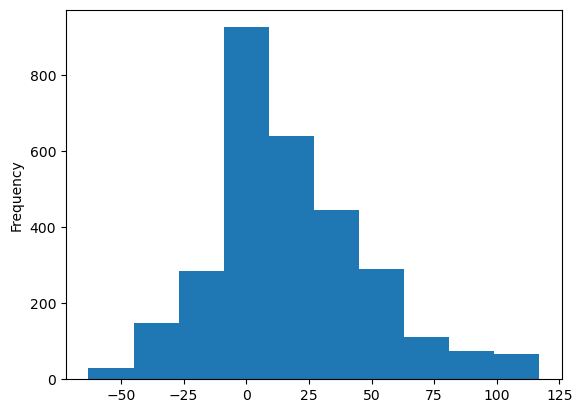

In [527]:
df['rozdil'].plot.hist()

In [528]:
df[df['rozdil'] < 0].groupby('100_a')['titul'].nunique().nlargest()

100_a
Seifert, Jaroslav      106
Sienkiewicz, Henryk     41
France, Anatole         25
Gide, André             23
Galsworthy, John        21
Name: titul, dtype: int64

In [529]:
df.groupby('100_a')['rozdil'].min().nlargest(200)

100_a
Seferis, Jiorgos                         48.0
Mommsen, Theodor                         35.0
Sachs, Nelly                             34.0
Agnon, Shmuel Yosef                      33.0
Mistral, Gabriela                        25.0
Elytis, Odysseus                         24.0
Walcott, Derek                           18.0
Benavente, Jacinto                       17.0
Kawabata, Yasunari                       16.0
Lagerkvist, Pär                          13.0
Brodskij, Iosif Aleksandrovič            10.0
Gao, Xingjian                            10.0
Singer, Isaac Bashevis                    9.0
Mistral, Frédéric                         8.0
Karlfeldt, Erik Axel                      8.0
Eucken, Rudolf                            6.0
Jiménez, Juan Ramón                       5.0
Saint-John Perse                          5.0
Montale, Eugenio                          4.0
Saramago, José                            4.0
Soyinka, Wole                             3.0
Heyse, Paul                 

In [530]:
df.groupby('100_7')['rozdil'].min().nlargest(30)

100_7
jn20000402202        48.0
skuk0000903          35.0
jn20000810312        34.0
jn20000600054        33.0
jn19981001854        25.0
ola2002161265        24.0
kup19950000109491    18.0
jn19990000655        17.0
jn20000603323        16.0
jn19990004816        13.0
jn19990001110        10.0
jo20000075484        10.0
jn19990007991         9.0
jo20000080728         8.0
xx0047446             8.0
skuk0000369           6.0
jn19981001567         5.0
jn19990007305         5.0
jn20000604067         4.0
xx0001988             4.0
jn20000605097         3.0
jn20000700710         3.0
jn20010420012         2.0
jn20010602599         2.0
xx0011793             2.0
jn19981002206         1.0
jn19990005954         1.0
jn19990007118         1.0
jn19990008691         1.0
jn20000604537         1.0
Name: rozdil, dtype: float64

In [531]:
df.sort_values(by='rozdil').head(10)

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul,072_a,072_x,260_c,264_c,300_a,490_a,655_a,rozdil
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknvls06667,041130s1921 xr g ||| p cze,NaN,"Seifert, Jaroslav",jk01110657,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Město v slzách :],NaN,[Jaroslav Seifert ; [s obálkou a dvěma kresbam...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Teige, Karel,]",[ill],NaN,[jk01132144],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1921.0,1984,Město v slzách,[821.162.3-1],[Česká poezie],[[1921]],None,[62 s. ;],None,[česká poezie],-63.0
nos190242218002,001111s1923 xr g p cze,NaN,"Seifert, Jaroslav",jk01110657,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Město v slzách :],NaN,[Jaroslav Seifert],NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1923.0,1984,Město v slzách,[821.162.3-1],[Česká poezie],[[1923]],None,[77 s. ;],None,[česká poezie],-61.0
bk193706620,990726s1923 xr g p cze,NaN,"Seifert, Jaroslav",jk01110657,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Samá láska :],NaN,[Jaroslav Seifert],NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1923.0,1984,Samá láska,[821.162.3-1],[Česká poezie],[1923],None,"[61, [III] s. :]",None,[česká poezie],-61.0
nos190242219,001111s1925 xr g p cze,NaN,"Seifert, Jaroslav",jk01110657,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Na vlnách TSF :],NaN,[Jaroslav Seifert ; typografická úprava a obál...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.0,1984,Na vlnách TSF,[821.162.3-1],[Česká poezie],[1925],None,"[68 s., 2 l. ;]",[Knih. Hosta ;],[česká poezie],-59.0
bk192701076,000209s1926 xr a g 000 p cze,NaN,"Seifert, Jaroslav",jk01110657,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Slavík zpívá špatně :],NaN,[Jaroslav Seifert ; [doslov napsal Julius Fučí...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Fučík, Julius,, Šíma, Josef,]","[aft, ill]",NaN,"[jk01032106, jk01122943]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1926.0,1984,Slavík zpívá špatně,[821.162.3-1],[Česká poezie],[1926],None,[63 s. :],[Odeon ;],[česká poezie],-58.0
bk192904290,991210s1929 xr cze,NaN,"Seifert, Jaroslav",jk01110657,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Hvězdy nad rajskou zahradou :],NaN,[Jaroslav Seifert ; obálku vyryl do linolea J....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1929.0,1984,Hvězdy nad rajskou zahradou,None,None,[1929],None,[68 s. ;],[Dobrá četba ;],None,-55.0
np9431793,941004s1929 xr g u0|0 p cze,NaN,"Seifert, Jaroslav",jk01110657,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Básně /],NaN,[Jaroslav Seifert ; [předml.] Bedřich Václavek],NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Václavek, Bedřich,]",[aui],NaN,[jk01141019],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1929.0,1984,Básně,[821.162.3-1],[Česká poezie],[1929],None,[147 s. :],[Generace ;],"[česká poezie, výbory, bibliofilie]",-55.0
bk192904291,991213s1929 xr g ||| p cze,NaN,"Seifert, Jaroslav",jk01110657,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Město v slzách :],NaN,[Jaroslav Seifert],NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1929.0,1984,Město v slzách,[821.162.3-1],[Česká poezie],[1929],None,"[67, [II] s. ;]",[Odeon ;],[česká poezie],-55.0
bk192904292,991213s1929 xr g 000 p cze,NaN,"Seifert, Jaroslav",jk01110657,[aut],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Poštovní holub :],NaN,[Jaroslav Seifert],NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [532]:
prekladatelstvo = df.dropna(subset=['700_4','700_7','700_a']).explode(['700_4','700_7','700_a'])

In [533]:
prekladatelstvo[prekladatelstvo['700_4'] == 'trl'].groupby('700_a')['100_a'].nunique().nlargest(10)

700_a
Kondrysová, Eva,                6
Krausová-Lesná, Milada,         6
Valja, Jiří,                    6
Hackenschmied, Hanuš,           5
Vrba, František,                5
Eisner, Pavel,                  4
Hron, Zdeněk,                   4
Kosterka, Hugo,                 4
Köllnová-Ehrmannová, Božena,    4
Nenadál, Radoslav,              4
Name: 100_a, dtype: int64

<Axes: xlabel='nobelovka', ylabel='rozdil'>

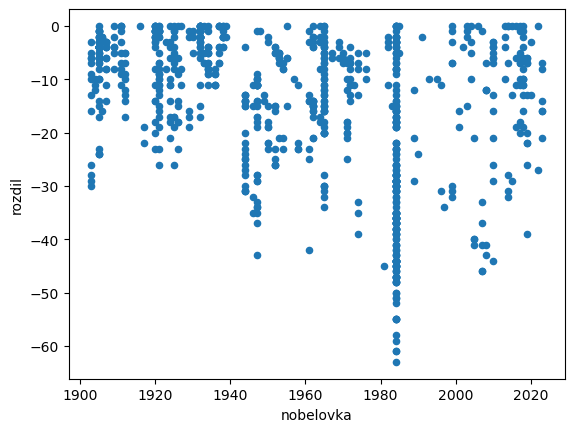

In [534]:
df[df['rozdil'] <= 0][['rozdil','nobelovka']].plot.scatter(x='nobelovka',y='rozdil')

<Axes: xlabel='nobelovka', ylabel='rozdil'>

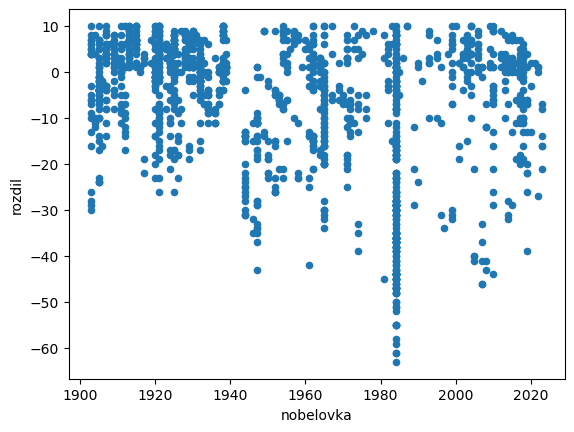

In [535]:
df[df['rozdil'] <= 10][['rozdil','nobelovka']].plot.scatter(x='nobelovka',y='rozdil')

<Axes: xlabel='nobelovka', ylabel='rozdil'>

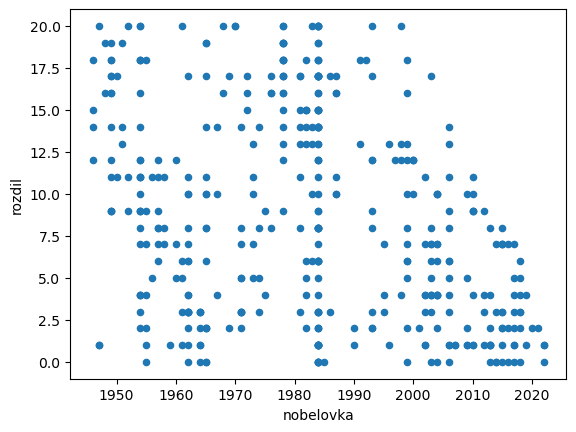

In [536]:
df[(df['rozdil'] >= 0) & (df['rozdil'] <= 20) & (df['nobelovka'] > 1945)][['rozdil','nobelovka']].plot.scatter(x='nobelovka',y='rozdil')